# Relatório de Análise VII

## Criando Agrupamento

In [30]:
import pandas as pd

In [31]:
dados = pd.read_csv('data/aluguel_residencial2.csv', sep =';')

In [32]:
dados.head(10)

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,1700.0,Apartamento
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,Casa
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,800.0,Apartamento
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,800.0,Apartamento
4,4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,Apartamento
5,5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1300.0,Apartamento
6,6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,Casa
7,7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,Casa
8,8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0,Apartamento
9,9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,1500.0,Apartamento


In [33]:
dados.Bairro.unique()

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Vista Alegre', 'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Praça Seca', 'Piedade', 'Lagoa', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Rocha Miranda', 'Engenho Novo', 'Engenho de Dentro',
       'Cidade Nova', 'Pilares', 'Tomás Coelho', 'Água Santa',
       'São Cristóvão', 'Ilha do Governador', 'Jardim Sulacap',
       'Oswaldo Cruz', 'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque',
       'Vaz Lobo', 'Madureira', 'São Francisco Xavier', 'Pe

In [34]:
bairros1 = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros1)
dados = dados[selecao]

In [35]:
dados['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
81           Flamengo
Name: Bairro, dtype: object

In [36]:
grupo_bairro = dados.groupby('Bairro')

In [37]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    6,    16,    18,    23,    32,    34,    37,    44,    45,
                58,
             ...
             22523, 22525, 22528, 22536, 22554, 22555, 22565, 22566, 22567,
             22574],
            dtype='int64', length=3922),
 'Botafogo': Int64Index([   25,    50,    91,    92,   115,   124,   132,   140,   206,
               210,
             ...
             22217, 22233, 22246, 22277, 22406, 22413, 22419, 22468, 22500,
             22544],
            dtype='int64', length=890),
 'Copacabana': Int64Index([    0,    11,    12,    13,    26,    27,    30,    33,    90,
                95,
             ...
             22460, 22466, 22490, 22497, 22534, 22537, 22549, 22563, 22564,
             22569],
            dtype='int64', length=2760),
 'Flamengo': Int64Index([   81,   144,   228,   295,   332,   358,   367,   372,   380,
               404,
             ...
             22308, 22331, 22381, 22403, 22433, 22457, 22482, 22485, 22494,
  

In [38]:
for bairro, data in grupo_bairro:
    print(f'{bairro} --> {data.Valor.mean()}')

Barra da Tijuca --> 7071.9181540030595
Botafogo --> 8681.197752808988
Copacabana --> 4135.914492753624
Flamengo --> 4148.489626556016
Ipanema --> 9375.905
Leblon --> 8757.75411119812
Tijuca --> 2042.1940700808625


In [39]:
grupo_bairro[['Valor','Bairro']].mean().round(2)

,Valor
Bairro,
Barra da Tijuca,7071.92
Botafogo,8681.20
Copacabana,4135.91
Flamengo,4148.49
Ipanema,9375.91
Leblon,8757.75
Tijuca,2042.19


## Estatísticas Descritivas

In [41]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3922.0,7071.92,11803.49,0.0,2500.0,4500.0,8500.00,600000.0
Botafogo,890.0,8681.20,150742.37,0.0,2200.0,3000.0,4341.25,4500000.0
Copacabana,2760.0,4135.91,3596.62,0.0,2000.0,3000.0,4800.00,35000.0
Flamengo,723.0,4148.49,3862.76,800.0,1900.0,2900.0,5000.00,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.00,90000.0
Leblon,1277.0,8757.75,6986.57,100.0,4500.0,7000.0,10500.00,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.00,45000.0


In [43]:
grupo_bairro['Valor'].aggregate(['min','max','sum']).rename(columns ={'min':'Mínimo','max':'Máximo','sum':'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,0.0,600000.0,27736063.0
Botafogo,0.0,4500000.0,7726266.0
Copacabana,0.0,35000.0,11415124.0
Flamengo,800.0,35000.0,2999358.0
Ipanema,1200.0,90000.0,16876629.0
Leblon,100.0,100000.0,11183652.0
Tijuca,750.0,45000.0,2272962.0


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (20,10))

Text(0.5, 1.0, 'Valor médio do alugual por Bairro')

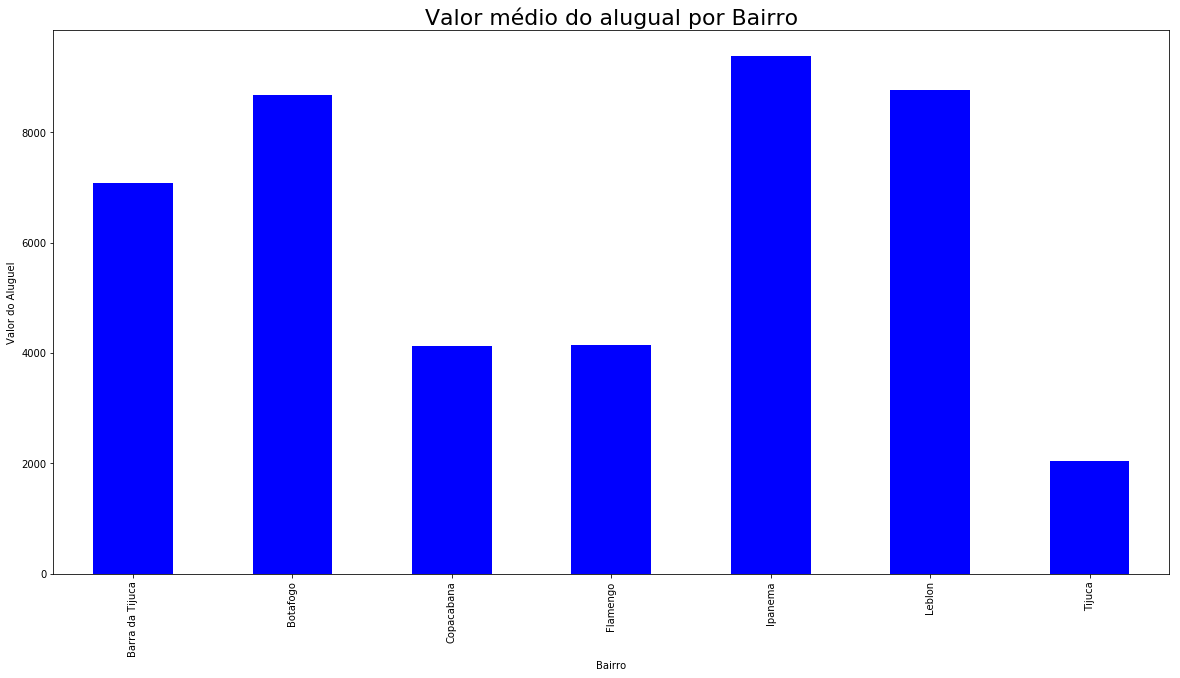

In [58]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do alugual por Bairro', {'fontsize':22})